In [84]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import IsolationForest


In [2]:
# Ayarlar
sns.set(style="whitegrid", palette="Set2", font_scale=1.1)

In [5]:
df=pd.read_csv("environmental_impact_data.csv")

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# İlk 5 satırı görüntüle
print("\n İlk 5 Satır:\n", df.head())


 İlk 5 Satır:
         Date      Country    Region  Plastic_Waste_Tons  \
0 2023-08-02          USA  Mountain             2393.68   
1 2020-08-16        India     Rural             1494.46   
2 2020-02-21        China     Urban             1382.28   
3 2021-07-17       Russia     Urban             1382.30   
4 2021-05-16  Philippines    Forest             4649.71   

   Plastic_Recycled_Tons  Burned_Waste_Tons  Illegal_Dumping_Cases  Trees_Cut  \
0                 535.52             842.34                      4        904   
1                1274.11             881.70                      5        835   
2                 572.55             577.54                      1        859   
3                 258.10             750.74                      3        160   
4                  54.06             286.07                      5        890   

   Deforestation_Area_Ha  Forest_Fires_Reported  CO2_Emissions_Tons  \
0                  19.54                      1             4120.39   


In [15]:
# Veri setinin yapısını incele
print("\n Veri Tipleri ve Boş Değerler:\n")
df.info()
print("----------------------------------------------------------")
# Boş değerlerin sayısı
print("\n📌 Eksik Değer Sayısı:\n", df.isnull().sum())


 Veri Tipleri ve Boş Değerler:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      3000 non-null   datetime64[ns]
 1   Country                   3000 non-null   object        
 2   Region                    3000 non-null   object        
 3   Plastic_Waste_Tons        3000 non-null   float64       
 4   Plastic_Recycled_Tons     3000 non-null   float64       
 5   Burned_Waste_Tons         3000 non-null   float64       
 6   Illegal_Dumping_Cases     3000 non-null   int64         
 7   Trees_Cut                 3000 non-null   int64         
 8   Deforestation_Area_Ha     3000 non-null   float64       
 9   Forest_Fires_Reported     3000 non-null   int64         
 10  CO2_Emissions_Tons        3000 non-null   float64       
 11  Water_Pollution_Index     3000 non-null   float64

In [17]:
# Temel istatistiksel özet
print("\n Sayısal Değişkenler İçin Temel İstatistikler:\n", df.describe())


 Sayısal Değişkenler İçin Temel İstatistikler:
                                 Date  Plastic_Waste_Tons  \
count                           3000         3000.000000   
mean   2022-02-03 00:41:45.599999744         2016.543340   
min              2020-01-01 00:00:00           25.860000   
25%              2021-01-28 18:00:00          995.380000   
50%              2022-02-09 00:00:00         1708.190000   
75%              2023-02-09 00:00:00         2681.107500   
max              2024-02-08 00:00:00        13610.230000   
std                              NaN         1400.947765   

       Plastic_Recycled_Tons  Burned_Waste_Tons  Illegal_Dumping_Cases  \
count            3000.000000        3000.000000            3000.000000   
mean              745.365163        1277.189323               3.002333   
min                 2.590000           3.350000               0.000000   
25%               307.032500         585.370000               2.000000   
50%               578.640000        1049

In [19]:
# Kategorik değişkenlerin eşsiz değer sayısı
print("\n Kategorik Değişken Değer Sayıları:\n")
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].nunique()} eşsiz değer")


 Kategorik Değişken Değer Sayıları:

Country: 10 eşsiz değer
Region: 6 eşsiz değer


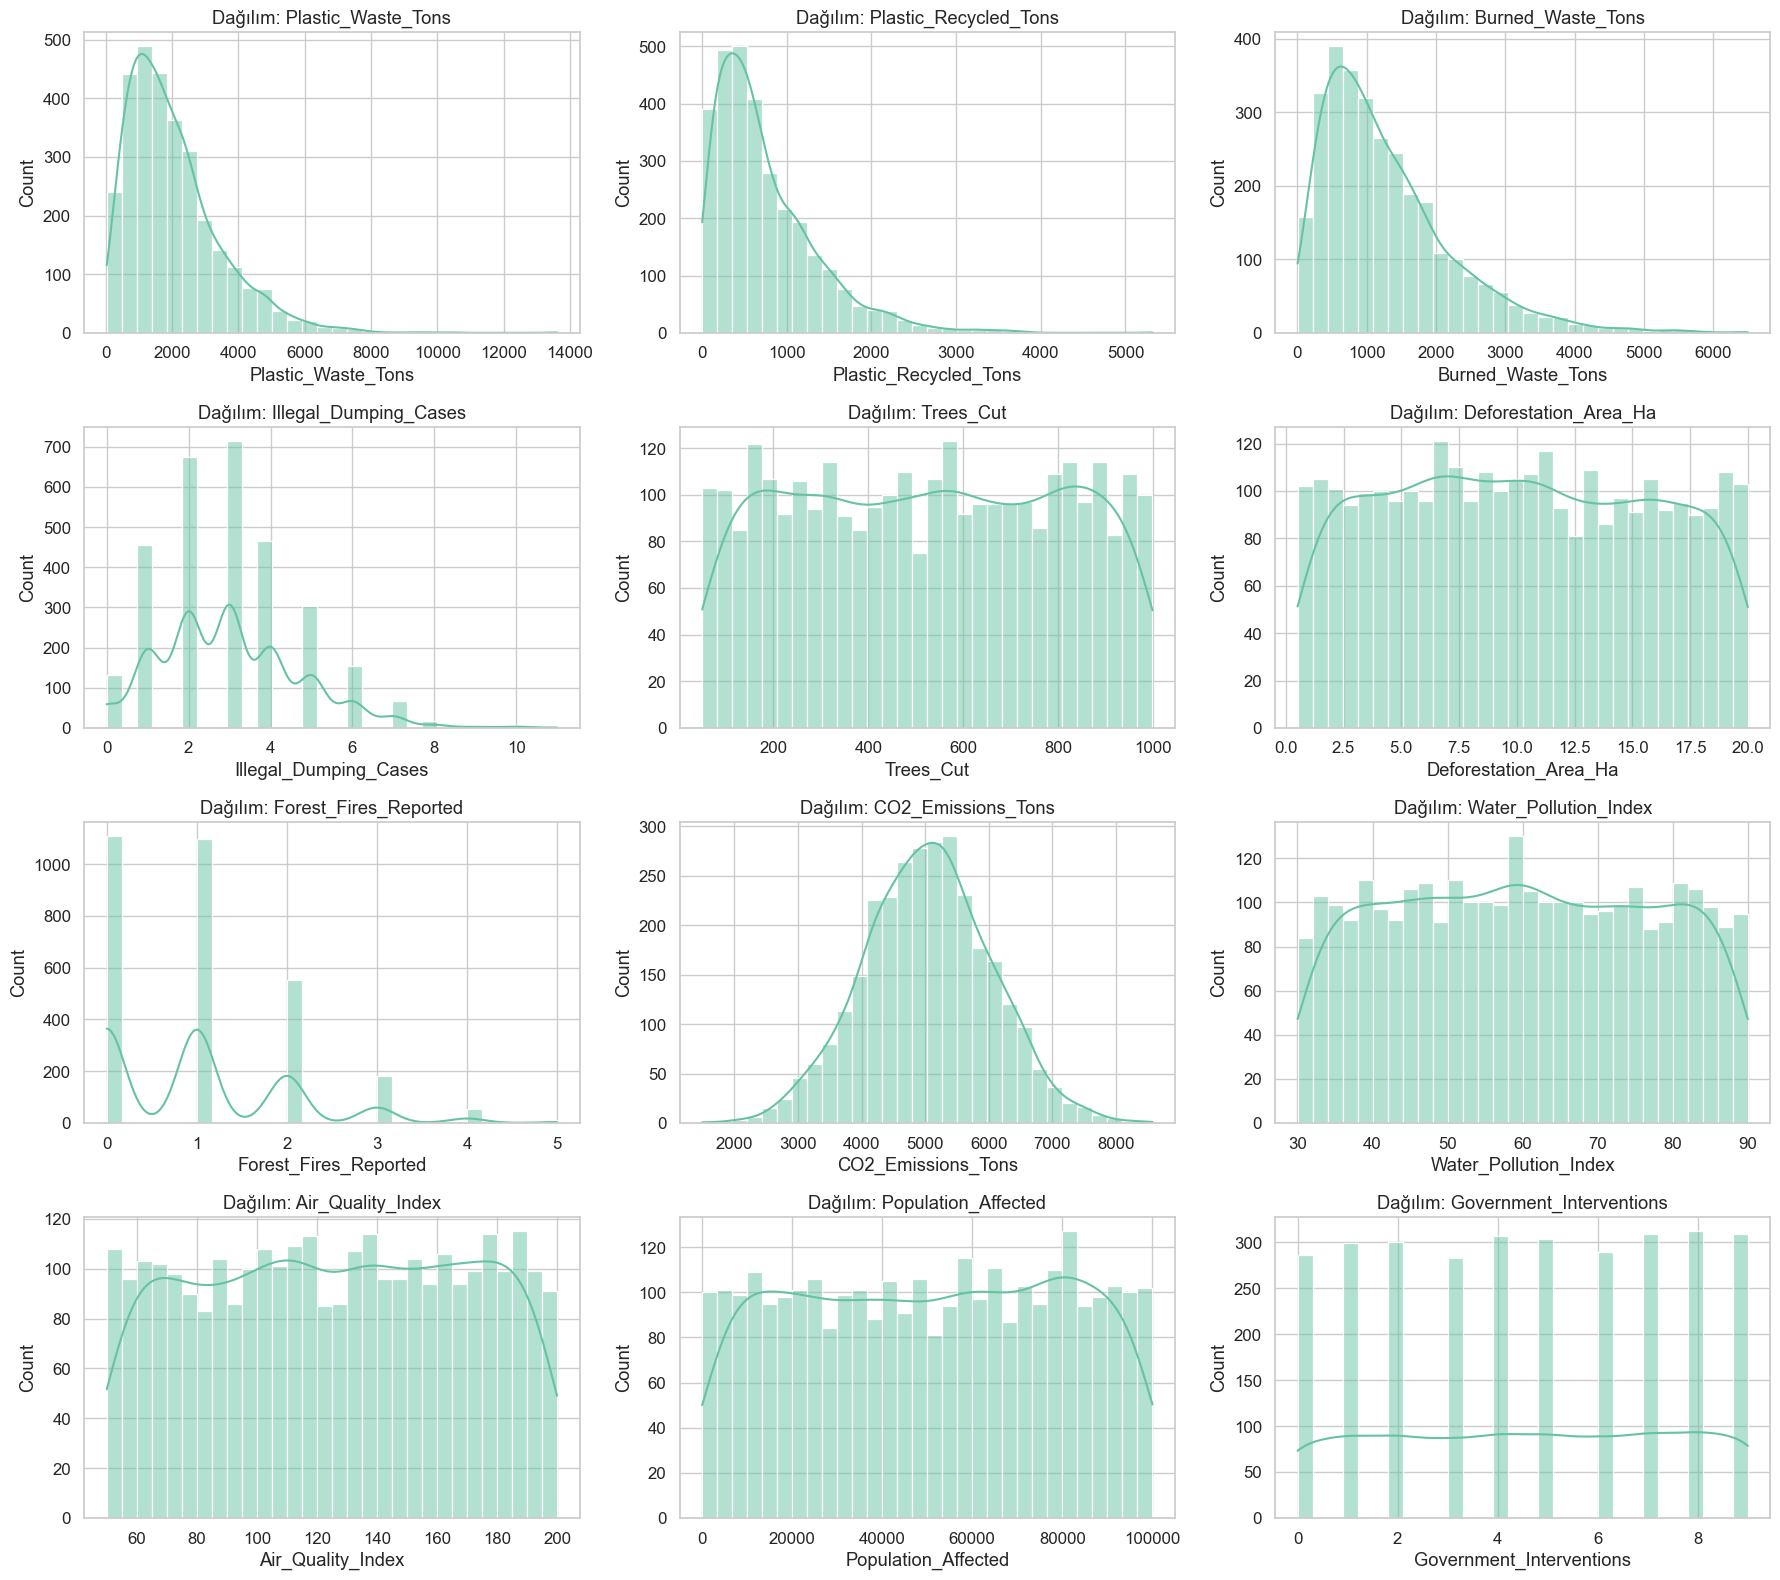

In [21]:
# Histogramlarla genel dağılımlar
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(18, 16))
for i, col in enumerate(num_cols[:12]):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"Dağılım: {col}")
plt.tight_layout()
plt.show()

In [23]:
# Değer aralıklarının kontrolü
print("\n📌 Değişken Aralıkları:\n")
for col in num_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}, boş={df[col].isnull().sum()}")



📌 Değişken Aralıkları:

Plastic_Waste_Tons: min=25.86, max=13610.23, boş=0
Plastic_Recycled_Tons: min=2.59, max=5318.49, boş=0
Burned_Waste_Tons: min=3.35, max=6497.89, boş=0
Illegal_Dumping_Cases: min=0, max=11, boş=0
Trees_Cut: min=50, max=998, boş=0
Deforestation_Area_Ha: min=0.51, max=20.0, boş=0
Forest_Fires_Reported: min=0, max=5, boş=0
CO2_Emissions_Tons: min=1492.6, max=8574.3, boş=0
Water_Pollution_Index: min=30.02, max=89.99, boş=0
Air_Quality_Index: min=50.02, max=199.98, boş=0
Population_Affected: min=137, max=99993, boş=0
Government_Interventions: min=0, max=9, boş=0
Reforestation_Projects: min=0, max=4, boş=0
Waste_Collected_Tons: min=17.19, max=9954.61, boş=0
Plastic_Bans_Enforced: min=0, max=1, boş=0
Awareness_Campaigns: min=0, max=14, boş=0
Monitoring_Stations: min=1, max=49, boş=0


In [25]:
# Özellik mühendisliği
df['Plastic_Recycle_Rate'] = df['Plastic_Recycled_Tons'] / df['Plastic_Waste_Tons']
df['Waste_Efficiency'] = df['Plastic_Recycled_Tons'] + df['Waste_Collected_Tons'] - df['Burned_Waste_Tons']
df['Tree_Loss_Index'] = df['Trees_Cut'] * df['Deforestation_Area_Ha']
df['Intervention_Score'] = (
    df['Government_Interventions'] * 0.3 +
    df['Awareness_Campaigns'] * 0.25 +
    df['Plastic_Bans_Enforced'] * 0.25 +
    df['Monitoring_Stations'] * 0.2
)
df['Climate_Score'] = (
    df['Plastic_Recycle_Rate'] * 0.3 +
    df['Reforestation_Projects'] * 0.2 +
    df['Plastic_Bans_Enforced'] * 0.2 +
    df['Awareness_Campaigns'] * 0.2 +
    df['Government_Interventions'] * 0.1
)

C:\Users\aziz-\AppData\Local\Temp\ipykernel_20464\2647076325.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")


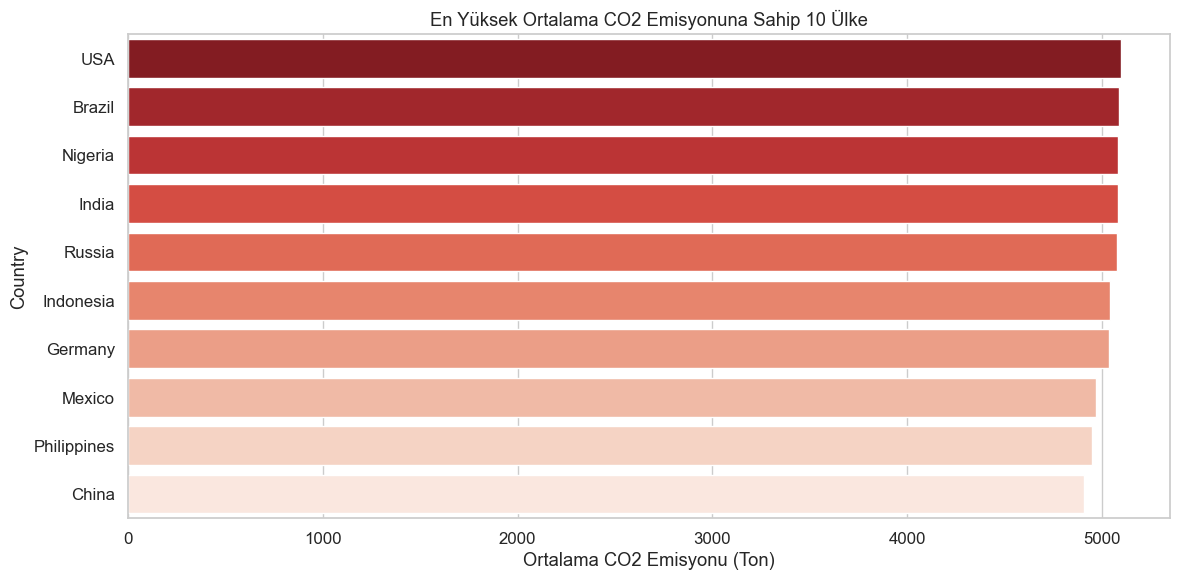

In [27]:
# Görselleştirmeler
plt.figure(figsize=(12,6))
top_countries = df.groupby("Country")["CO2_Emissions_Tons"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="Reds_r")
plt.title("En Yüksek Ortalama CO2 Emisyonuna Sahip 10 Ülke")
plt.xlabel("Ortalama CO2 Emisyonu (Ton)")
plt.tight_layout()
plt.show()

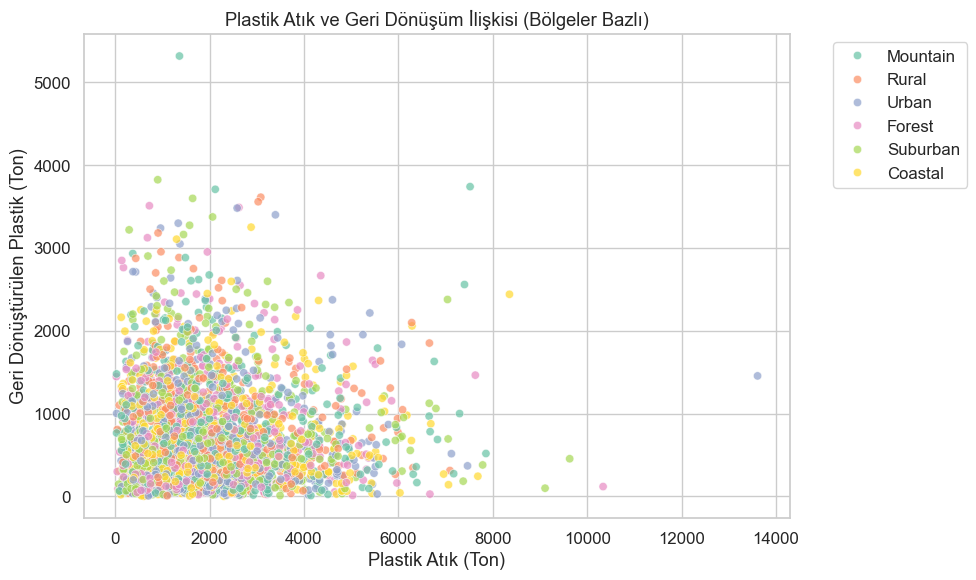

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="Plastic_Waste_Tons", y="Plastic_Recycled_Tons", hue="Region", alpha=0.7)
plt.title("Plastik Atık ve Geri Dönüşüm İlişkisi (Bölgeler Bazlı)")
plt.xlabel("Plastik Atık (Ton)")
plt.ylabel("Geri Dönüştürülen Plastik (Ton)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

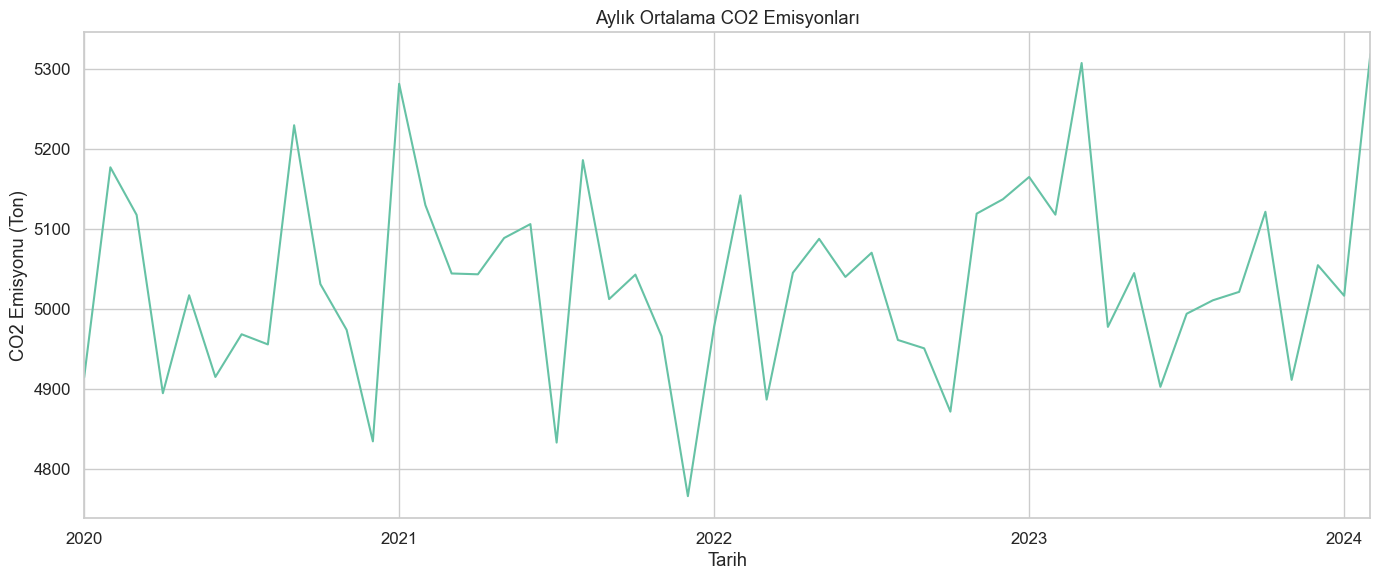

In [31]:
monthly_emissions = df.resample('M', on='Date')['CO2_Emissions_Tons'].mean()
plt.figure(figsize=(14,6))
monthly_emissions.plot()
plt.title("Aylık Ortalama CO2 Emisyonları")
plt.xlabel("Tarih")
plt.ylabel("CO2 Emisyonu (Ton)")
plt.tight_layout()
plt.show()

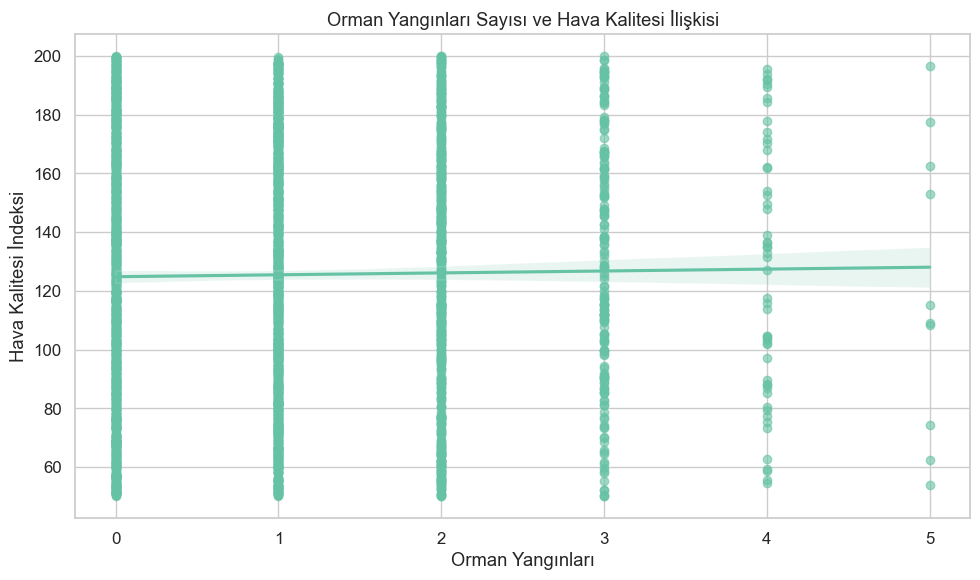

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x="Forest_Fires_Reported", y="Air_Quality_Index", scatter_kws={'alpha':0.6})
plt.title("Orman Yangınları Sayısı ve Hava Kalitesi İlişkisi")
plt.xlabel("Orman Yangınları")
plt.ylabel("Hava Kalitesi İndeksi")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Local\Temp\ipykernel_20464\1034511881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Region", y="Water_Pollution_Index", palette="Blues")


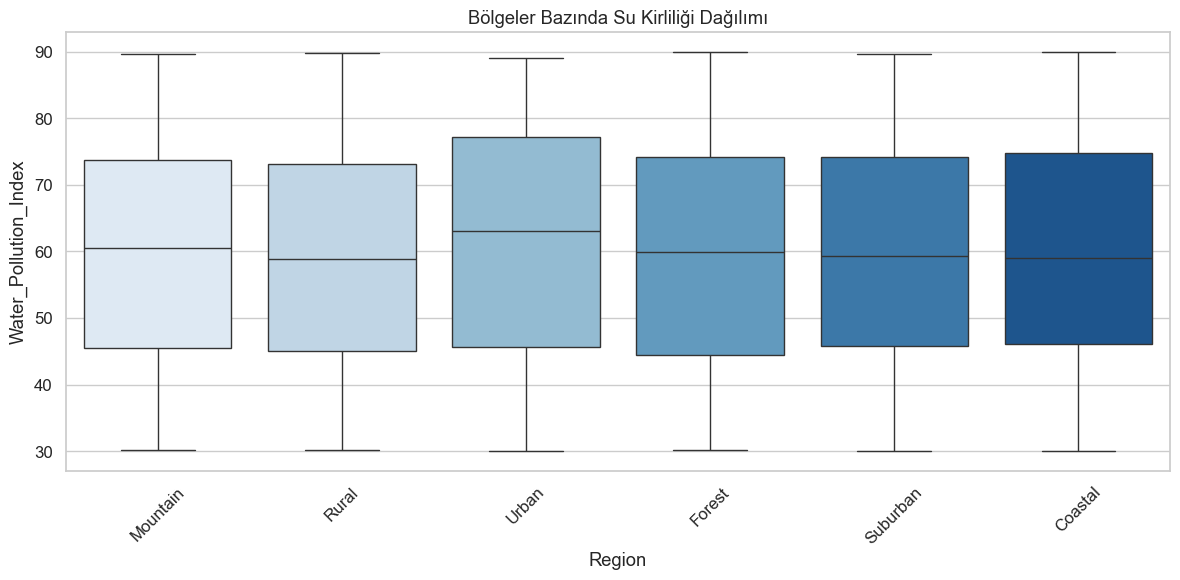

In [37]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="Region", y="Water_Pollution_Index", palette="Blues")
plt.title("Bölgeler Bazında Su Kirliliği Dağılımı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

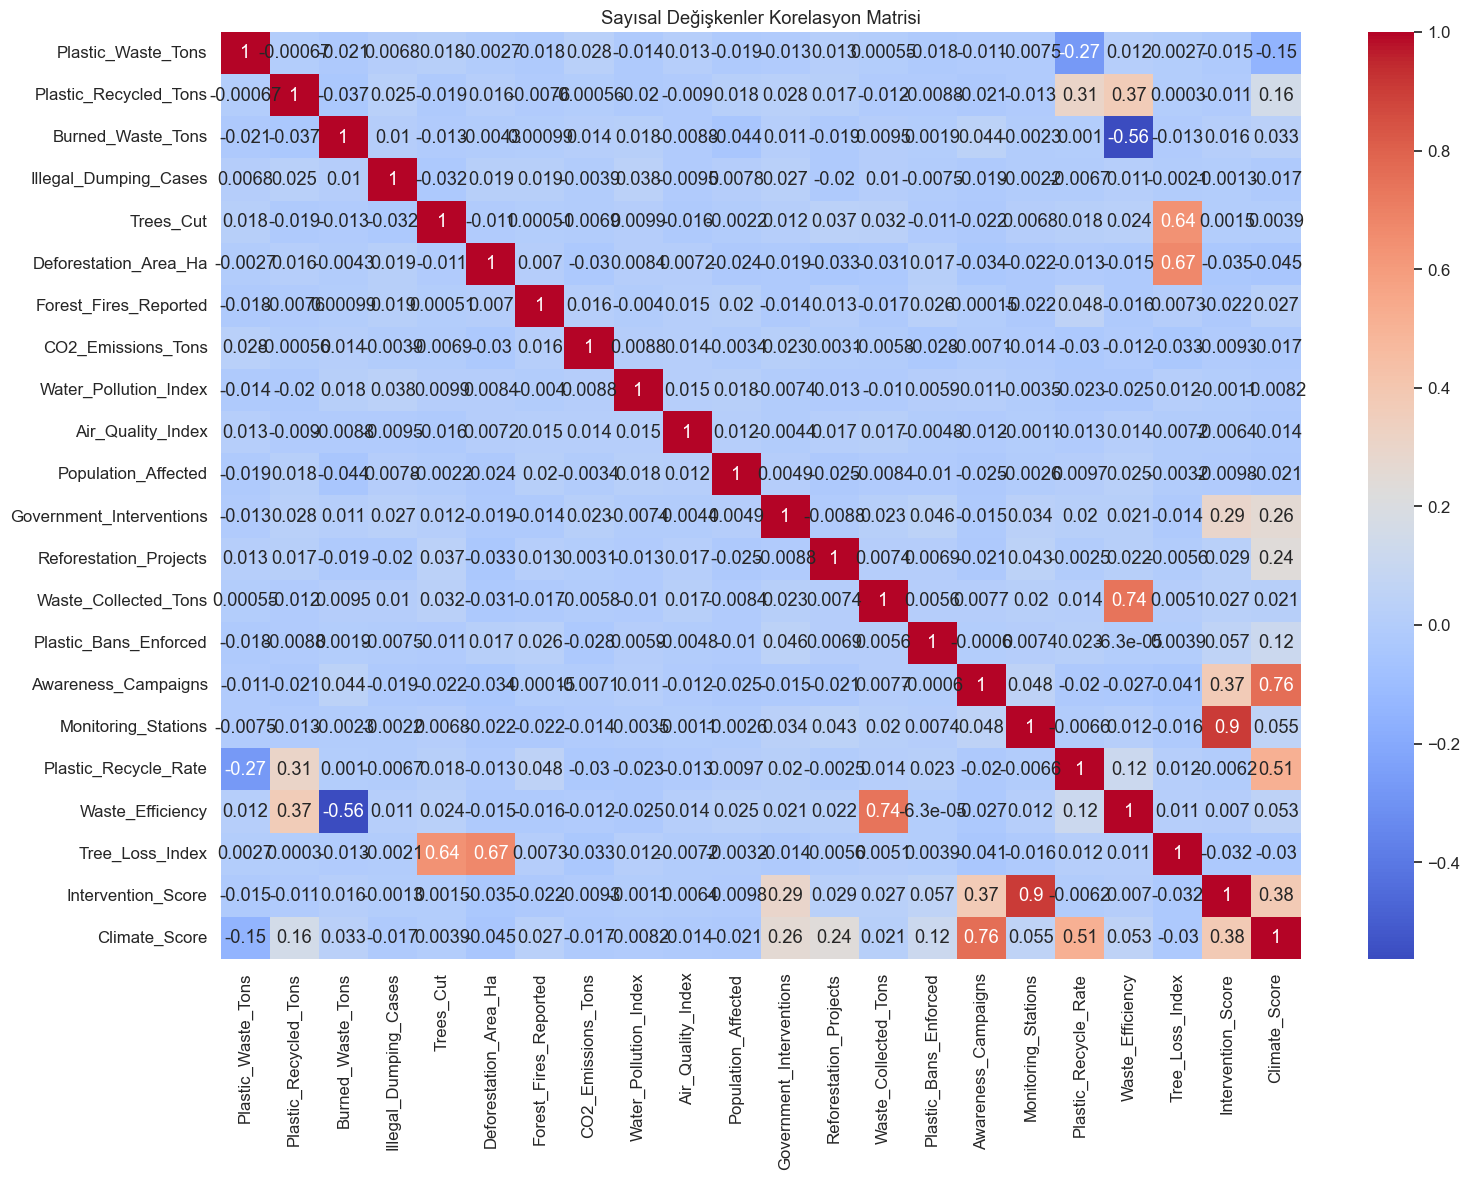

In [39]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Sayısal Değişkenler Korelasyon Matrisi")
plt.tight_layout()
plt.show()

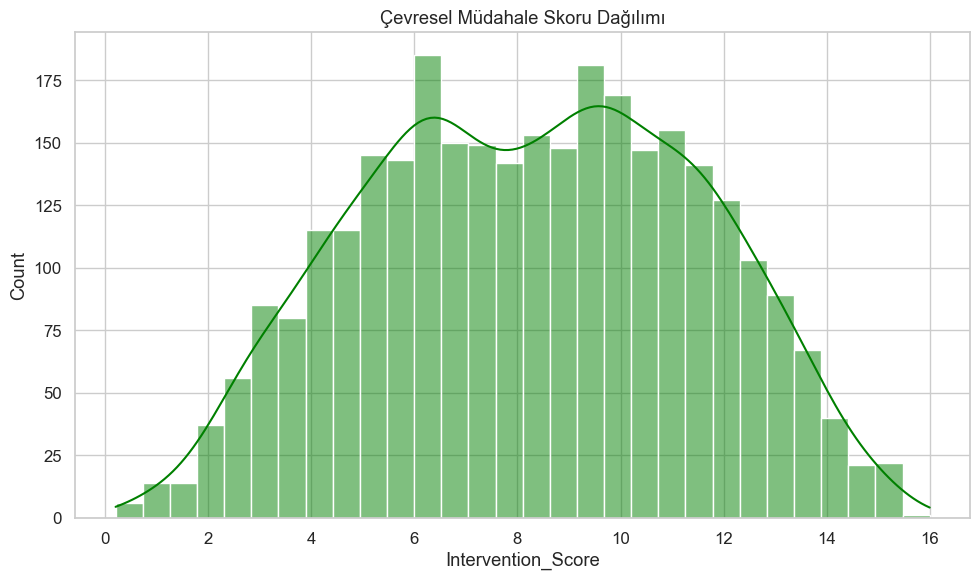

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['Intervention_Score'], bins=30, kde=True, color='green')
plt.title("Çevresel Müdahale Skoru Dağılımı")
plt.xlabel("Intervention_Score")
plt.tight_layout()
plt.show()

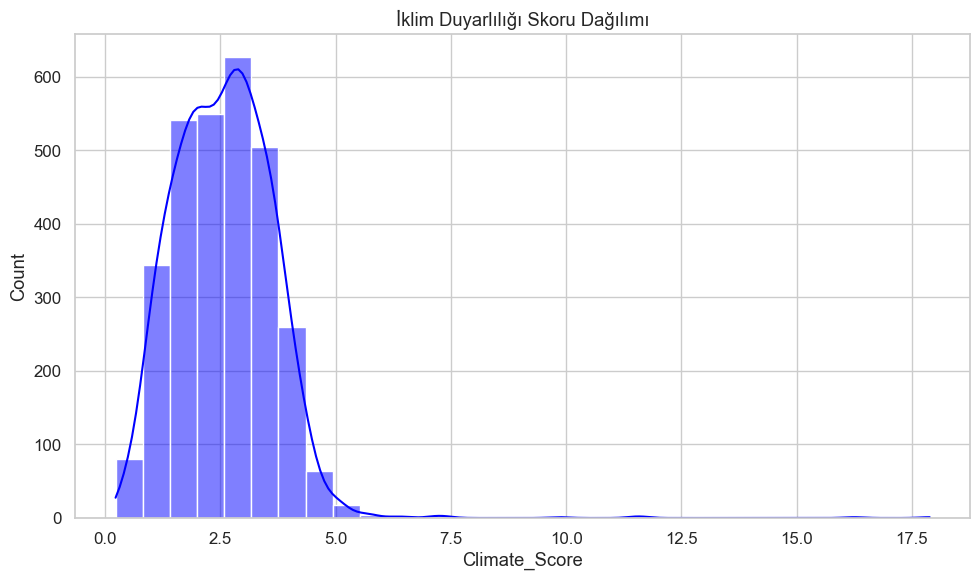

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(df['Climate_Score'], bins=30, kde=True, color='blue')
plt.title("İklim Duyarlılığı Skoru Dağılımı")
plt.xlabel("Climate_Score")
plt.tight_layout()
plt.show()

C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


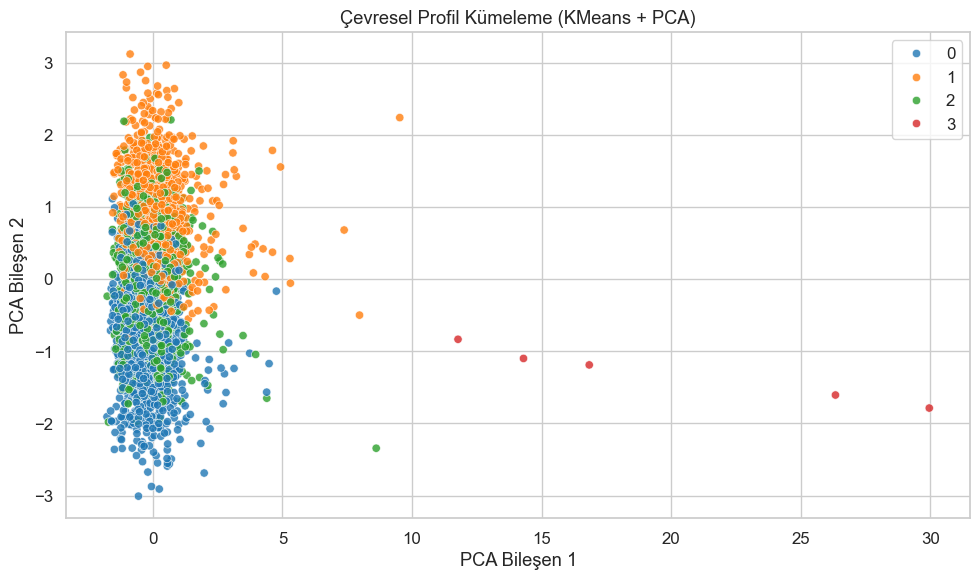

In [48]:
# features = ['CO2_Emissions_Tons', 'Plastic_Recycle_Rate', 'Water_Pollution_Index', 'Air_Quality_Index', 'Climate_Score']
x = df[features].dropna()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
kmeans = KMeans(n_clusters=4, random_state=42)
klabels = kmeans.fit_predict(x_scaled)
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], hue=klabels, palette='tab10', alpha=0.8)
plt.title("Çevresel Profil Kümeleme (KMeans + PCA)")
plt.xlabel("PCA Bileşen 1")
plt.ylabel("PCA Bileşen 2")
plt.tight_layout()
plt.show()


In [66]:
# Kümeleme için kullanılacak değişkenler
cluster_cols = ["Climate_Score", "Intervention_Score", "Tree_Loss_Index", "Plastic_Recycle_Rate"]
df_cluster = df[cluster_cols].dropna()

# Ölçekleme
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# KMeans ile 3 kümeye ayır
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df.loc[df_cluster.index, "Cluster"] = kmeans.fit_predict(scaled_data)


In [52]:
# Küme bazında ortalamaları karşılaştıralım
df.groupby("Cluster")[cluster_cols].mean().round(2)


,Climate_Score,Intervention_Score,Tree_Loss_Index,Plastic_Recycle_Rate
Cluster,,,,
0.0,3.19,10.64,5083.13,0.78
1.0,1.92,5.94,5506.24,0.54
2.0,11.03,7.65,6101.50,28.75


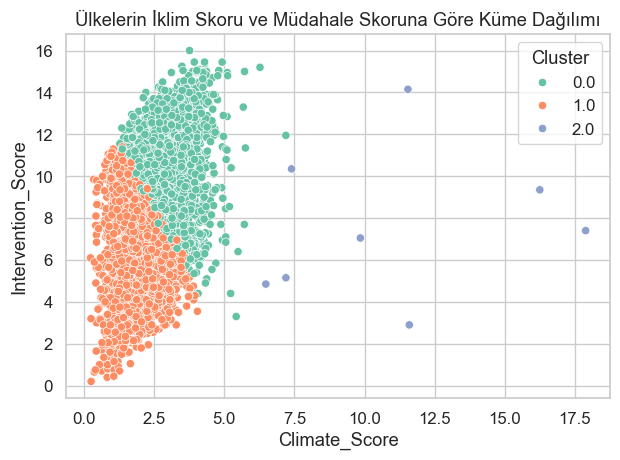

In [62]:
sns.scatterplot(data=df, x="Climate_Score", y="Intervention_Score", hue="Cluster", palette="Set2")
plt.title("Ülkelerin İklim Skoru ve Müdahale Skoruna Göre Küme Dağılımı")
plt.tight_layout()
plt.show()


In [64]:
# Ülke, bölge ve küme bilgilerini içeren tablo
clustered_countries = df.loc[df_cluster.index, ["Country", "Region", "Cluster"]]

# Her kümede hangi ülkeler var – örnek olarak ilk 10'u gösterelim
for cluster_id in sorted(clustered_countries["Cluster"].unique()):
    print(f"\n Küme {int(cluster_id)} ülkeleri:")
    display(clustered_countries[clustered_countries["Cluster"] == cluster_id]
            .sort_values("Country")
            .drop_duplicates("Country")
            .head(10))  # Çok uzunsa sadece 10 ülke



 Küme 0 ülkeleri:


,Country,Region,Cluster
2999,Brazil,Mountain,0.0
2909,China,Coastal,0.0
1434,Germany,Coastal,0.0
240,India,Forest,0.0
1459,Indonesia,Suburban,0.0
1042,Mexico,Suburban,0.0
824,Nigeria,Urban,0.0
2685,Philippines,Mountain,0.0
2551,Russia,Urban,0.0
21,USA,Urban,0.0



 Küme 1 ülkeleri:


,Country,Region,Cluster
183,Brazil,Suburban,1.0
1020,China,Forest,1.0
2879,Germany,Urban,1.0
1619,India,Urban,1.0
334,Indonesia,Urban,1.0
36,Mexico,Suburban,1.0
2017,Nigeria,Coastal,1.0
1485,Philippines,Rural,1.0
139,Russia,Urban,1.0
584,USA,Mountain,1.0



 Küme 2 ülkeleri:


,Country,Region,Cluster
2229,Germany,Mountain,2.0
2539,Mexico,Forest,2.0
1674,Philippines,Urban,2.0
328,Russia,Forest,2.0


In [78]:
# Hedef değişken
target = "Climate_Score"

# Girdi değişkenleri (Cluster ve Climate_Score hariç sayısallar)
feature_cols = df.select_dtypes(include=[np.number]).columns.drop(["Climate_Score", "Cluster"])
X = df[feature_cols]
y = df["Climate_Score"]

# Eksik değerleri ortalama ile dolduralım
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_imputed, y)

RandomForestRegressor(random_state=42)

In [79]:
# Önem değerlerini al
importances = model.feature_importances_
importance_df = pd.DataFrame({
    "Feature": feature_cols,
    "Importance": importances
}).sort_values("Importance", ascending=False)

C:\Users\aziz-\AppData\Local\Temp\ipykernel_20464\2309439960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")


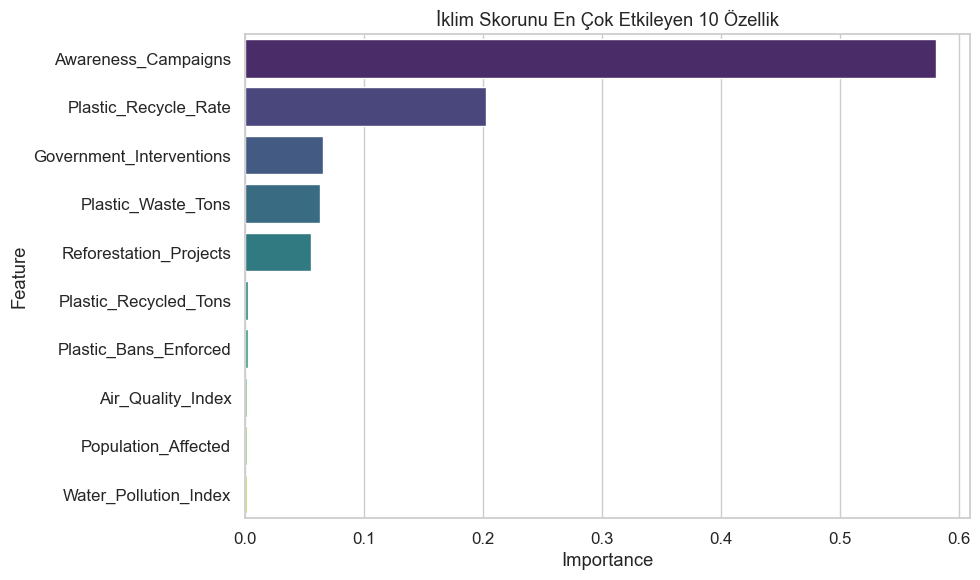

,Feature,Importance
15,Awareness_Campaigns,0.580880
17,Plastic_Recycle_Rate,0.202823
11,Government_Interventions,0.066173
0,Plastic_Waste_Tons,0.063737
12,Reforestation_Projects,0.056076
1,Plastic_Recycled_Tons,0.003150
14,Plastic_Bans_Enforced,0.002957
9,Air_Quality_Index,0.002395
10,Population_Affected,0.002319
8,Water_Pollution_Index,0.002112


In [80]:
# Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x="Importance", y="Feature", palette="viridis")
plt.title("İklim Skorunu En Çok Etkileyen 10 Özellik")
plt.tight_layout()
plt.show()

# İlk 10 özelliği tablo olarak da yazdır
importance_df.head(10)

In [86]:
# CO2 emisyonları olan satırları filtreleyelim
df_anomaly = df[["CO2_Emissions_Tons", "Country", "Date"]].dropna()

In [88]:
# Modeli uygulayalım
model = IsolationForest(contamination=0.05, random_state=42)
df_anomaly["Anomaly"] = model.fit_predict(df_anomaly[["CO2_Emissions_Tons"]])

In [90]:
# Anomalileri seçelim
anomalies = df_anomaly[df_anomaly["Anomaly"] == -1]

# Anomali sayısı
print(f"🚨 Tespit edilen anomali sayısı: {len(anomalies)}")

🚨 Tespit edilen anomali sayısı: 150


In [92]:
# Anomali değerlerini tablo olarak göster
anomalies.sort_values("CO2_Emissions_Tons", ascending=False).head(10)

,CO2_Emissions_Tons,Country,Date,Anomaly
2542,8574.30,Philippines,2021-06-27,-1
531,8353.43,Mexico,2022-02-27,-1
1327,8318.89,Russia,2022-03-21,-1
2326,8088.05,Germany,2022-11-27,-1
1675,8075.09,Indonesia,2021-10-26,-1
2588,8021.55,Mexico,2022-02-10,-1
2141,7872.33,Russia,2023-08-17,-1
137,7869.86,Brazil,2020-04-06,-1
384,7760.56,China,2023-02-27,-1
2482,7737.19,Germany,2023-10-25,-1


C:\Users\aziz-\AppData\Local\Temp\ipykernel_20464\1833607311.py:7: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
C:\Users\aziz-\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


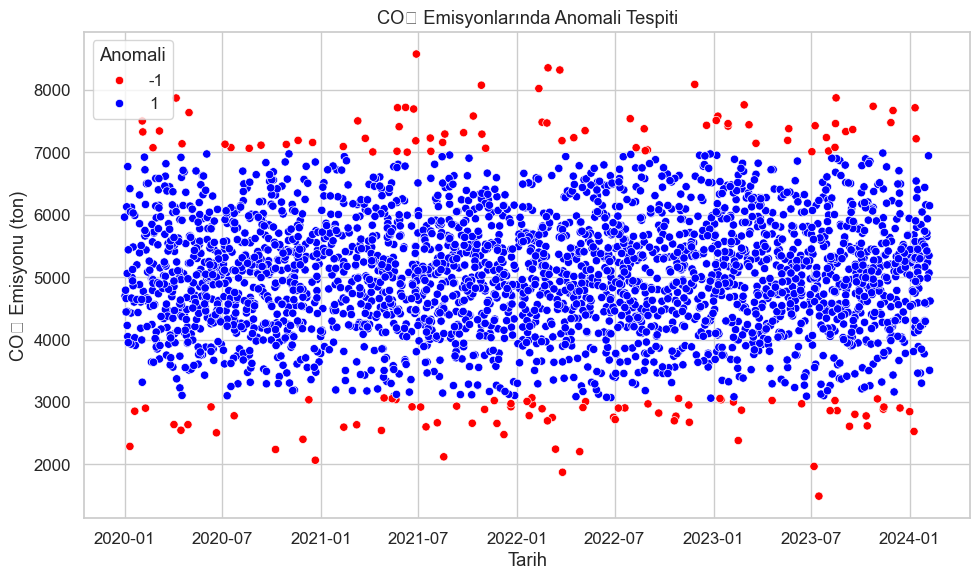

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_anomaly, x="Date", y="CO2_Emissions_Tons", hue="Anomaly", palette={1: "blue", -1: "red"})
plt.title("CO₂ Emisyonlarında Anomali Tespiti")
plt.xlabel("Tarih")
plt.ylabel("CO₂ Emisyonu (ton)")
plt.legend(title="Anomali")
plt.tight_layout()
plt.show()
